<a href="https://colab.research.google.com/github/Chiragpanchal020/Analysis-of-California-housing-prices/blob/main/Analysis_of_California_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of California housing prices**

**Please address the following questions:**



**1. What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.**



**2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.**



**3. Show with the help of visualization, how median_income and median_house_values are related?**



**4. Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.**



**5. Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.**



**6. Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.**



**7. Plot latitude versus longitude and explain your observations.**



**8. Create a data set for which the ocean_proximity is ‘Near ocean’.**



**9. Find the mean and median of the median income for the data set created in question 8.**



**10. Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.**



# **Introduction**
The California Housing dataset is a multivariate dataset that contains information about housing prices in California. The dataset has 10 features and 20,640 rows. The features are:

**longitude**: The longitude of the house.

**latitude**: The latitude of the house.

**housing_median_age**: The median age of the houses in the block.

**total_rooms**: The total number of rooms in the house.

**total_bedrooms**: The total number of bedrooms in the house.

**population**: The number of people living in the block.

**households**: The number of households in the block.

**median_income**: The median income of the households in the block.

**ocean_proximity**: The proximity of the house to the ocean.

**median_house_value**: The median house value in the block.

**--The first two features, longitude and latitude, are continuous numerical features. They can take on any real number value.**

**--The next three features, housing_median_age, total_rooms, and total_bedrooms, are discrete numerical features. They can only take on a limited number of values.**

**--The next two features, population and households, are also discrete numerical features.**

**--The median_income feature is an ordinal numerical feature. It can be ranked from low to high, but the difference between two consecutive values is not meaningful.**

**--The ocean_proximity feature is a nominal categorical feature. It has five categories: "NEAR OCEAN", "INLAND", "NEAR BAY", "<1H OCEAN", and "ISLAND".**

**--The median_house_value feature is the target variable. It is the value that we are trying to predict.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/housing-_1_.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


# **1. What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.**

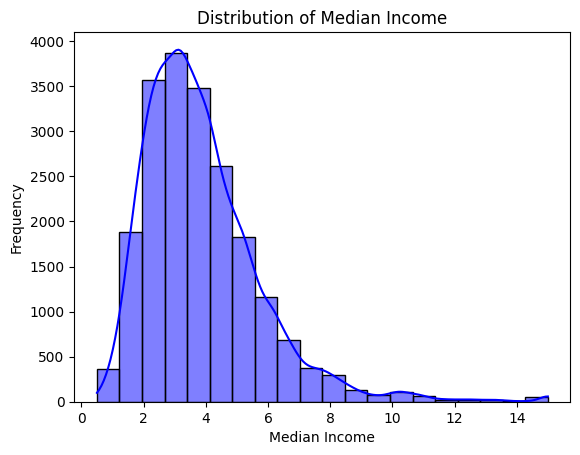

In [ ]:

#histogram to visualize the distribution of median income
sns.histplot(df["median_income"], bins=20, kde=True, color='blue')
plt.title("Distribution of Median Income")
plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.show()


In [ ]:
avg_median_income=df['median_income'].mean()
print('The average median income of the data set is:',avg_median_income)

The average median income of the data set is: 3.8706710029069766


# **Task 1:-Inference**
#--The histogram shows that the distribution of the median income is right skewed. This means that there are more houses with a lower median income than there are houses with a higher median income.
#--The right skewness is likely due to the fact that there are a few houses with very high median incomes. These outliers are houses that are located in expensive areas, such as San Francisco and Los Angeles.

# **2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.**


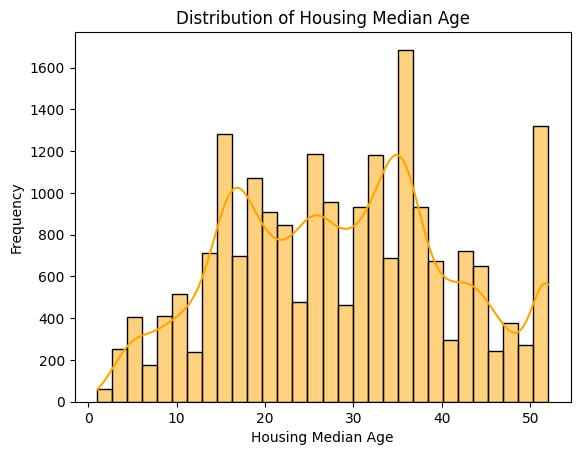

In [ ]:
# We use the sns.histplot function to visualize the distribution of the "housing_median_age" column.
# The "bins" parameter specifies the number of bins or intervals in the histogram (20 in this case).
# The "kde=True" argument adds a smoothed kernel density estimate to the histogram.
# The color is set to 'orange' for better visibility.
sns.histplot(df["housing_median_age"], bins=30, kde=True, color='orange')
plt.title("Distribution of Housing Median Age")
plt.xlabel("Housing Median Age")#we have put the labels for clear interpretation
plt.ylabel("Frequency")
plt.show()#this will render and display the plot on your screen.


<Axes: xlabel='housing_median_age', ylabel='count'>

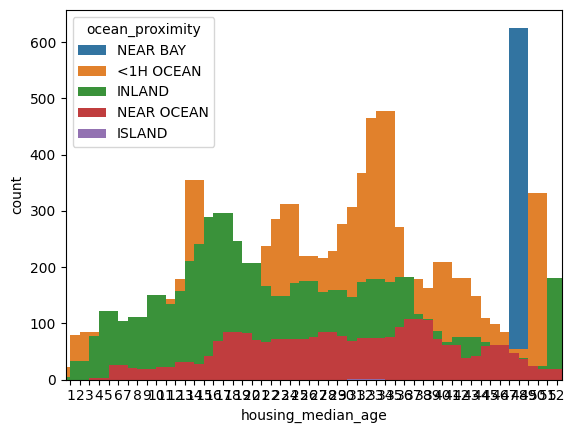

In [ ]:
sns.countplot(data=df,x='housing_median_age',hue='ocean_proximity',width=10)

#**Task 2:- Interferance**
#--The distribution is not perfectly smooth, which indicates that there are some outliers in the data.
#--The distribution is not symmetric, which indicates that there may be some skewness in the data.
#-- The distribution has a peak at around 35 years, which indicates that this is the most common median age for houses in the dataset.

# **3. Show with the help of visualization, how median_income and median_house_values are related?**

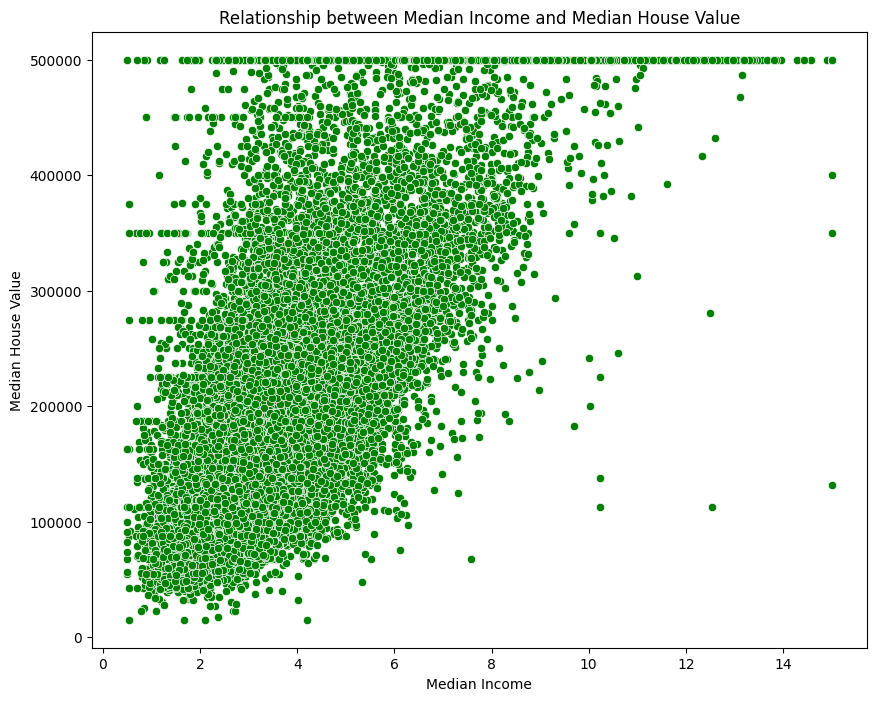

In [ ]:
# Create a scatter plot to show the relationship between median_income and median_house_value
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="median_income", y="median_house_value", color='green')
plt.title("Relationship between Median Income and Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


# **Task 3:- Inference**
#The scatter plot illustrates a strong positive linear relationship between median house value and median income.
#As median income increases, there is a corresponding upward trend in median house value. This suggests that areas with higher median incomes tend to have higher median house values, likely due to the ability of residents to afford more expensive homes.
#The linear relationship indicates that as income rises, there's a tendency for housing prices to also rise,
# reflecting a connection between economic prosperity and real estate values.

# **4. Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.**



In [ ]:
# Filtering the DataFrame to get rows with null values in the total_bedrooms column
rows_with_nulls = df[df['total_bedrooms'].isnull()]

# Print the filtered DataFrame
rows_with_nulls



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,220500,NEAR OCEAN
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,167400,NEAR OCEAN
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,410700,<1H OCEAN
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,258100,<1H OCEAN


In [ ]:
df_notnull=df.drop(rows_with_nulls.index)
df_notnull.head(292)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
287,-122.18,37.78,50,1642,322.0,713,284,3.2984,160700,NEAR BAY
288,-122.17,37.78,49,893,177.0,468,181,3.8750,140600,NEAR BAY
289,-122.17,37.78,52,653,128.0,296,121,4.1750,144000,NEAR BAY
291,-122.16,37.77,48,977,194.0,446,180,4.7708,156300,NEAR BAY


# **Task 4:-Inference**
 In this task first we have filtered rows with null values.then in order to delete these we have used .drop() and thus we have clean dataset without any null values.



# **5. Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.**

In [ ]:
# Calculate the mean value of the 'total_bedrooms' column
mean_total_bedrooms = df['total_bedrooms'].mean()

# Replace missing values in 'total_bedrooms' column with the mean value
df['total_bedrooms'].fillna(mean_total_bedrooms, inplace=True)
#The fillna() method replaces the NULL values with a specified value.

# Print the modified DataFrame
df.head(292)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.000000,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.000000,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.000000,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.000000,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.000000,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
287,-122.18,37.78,50,1642,322.000000,713,284,3.2984,160700,NEAR BAY
288,-122.17,37.78,49,893,177.000000,468,181,3.8750,140600,NEAR BAY
289,-122.17,37.78,52,653,128.000000,296,121,4.1750,144000,NEAR BAY
290,-122.16,37.77,47,1256,537.870553,570,218,4.3750,161900,NEAR BAY


#**Task 5:- Inference**

# --we have modified the  dataset by replacing missing values in the total_bedrooms column with the mean value calculated from the original dataset. The mean value represents the average number of total bedrooms. This method ensures that missing values are replaced while maintaining the overall distribution of the data. The resulting dataset provides a complete set of data points without any null values.

# **6. Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.**

In [ ]:
def median_of_column(column_name):

  #Returns the median of the data in the specified column.

  #column_name: The name of the column.

  #Returns:The median of the data in the specified column.

  # Exclude the ocean_proximity column because it does not have numerical values
  #df_x= df.drop("ocean_proximity", axis=1)

  # Get the median of the specified column
  median = df[column_name].median()

  return median



In [ ]:
# Get the median value of any column
median_col = median_of_column("population")

print(median_col)


1166.0


#**Task 6:- Inference**
#--So here we have created a function called median_of_column to get median of any desired column.we have excluded ocean_proximity column because it does not have numerical values.after that we have calculated median and at the end this function return median value of given column

# **7. Plot latitude versus longitude and explain your observations.**

[]

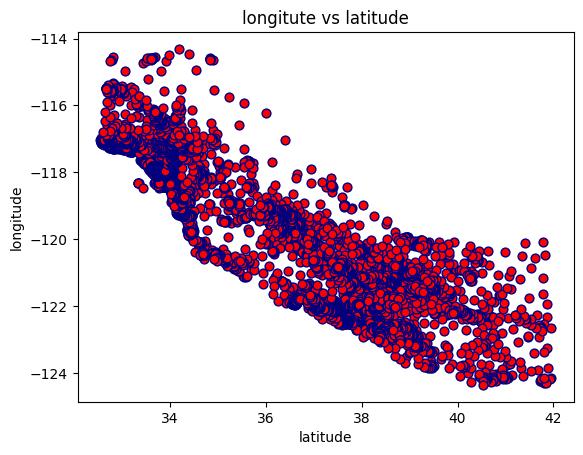

In [ ]:
plt.scatter(df['latitude'],df['longitude'], edgecolor = 'Navy', facecolor = 'red', s = 40, marker = 'o')
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.title("longitute vs latitude")
plt.plot()

#**Task 7:- Inference**

#--There are a few possible explanations for this trend. One possibility is that the coastal areas are more desirable places to live because of the climate and the proximity to the ocean. Another possibility is that the coastal areas are more developed, which has led to an increase in housing demand.
#--There are also some areas with less data, such as the Central Valley and the desert regions. These outliers may be due to a number of factors, such as the presence of a slum or a low-income neighborhood.
#--Overall, the plot of latitude versus longitude shows that the housing prices in California are distributed along the coast. The highest housing prices are in the coastal areas, especially near San Francisco and Los Angeles. The housing prices in the inland areas are generally lower.

# **8. Create a data set for which the ocean_proximity is ‘Near ocean’.**

In [ ]:

# Filter for rows where ocean_proximity is equal to "NEAR OCEAN"
df_near_ocean=df.loc[df["ocean_proximity"] == "NEAR OCEAN"]
df_near_ocean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,500001,NEAR OCEAN
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,321800,NEAR OCEAN
20423,-119.00,34.08,17,1822,438.0,578,291,5.4346,428600,NEAR OCEAN
20424,-118.75,34.18,4,16704,2704.0,6187,2207,6.6122,357600,NEAR OCEAN


In [ ]:
df_near_ocean['median_house_value'].mean()

249433.97742663656

In [ ]:
df['median_house_value'].mean()

206855.81690891474

#**Task 8:- Inference**
#--so by creating this dataset we can observe that when ocean proximity is near ocean means houses near costal area the prices usually high compare to other locations.

# **9. Find the mean and median of the median income for the data set created in question 8.**




In [ ]:
mean_near_ocean=df_near_ocean['median_income'].mean()
mean_near_ocean

4.0057848006019565

In [ ]:
df['median_income'].mean()

3.8706710029069766

In [ ]:
median_near_ocean=df_near_ocean['median_income'].median()
median_near_ocean

3.64705

In [ ]:
df['median_income'].median()

3.5347999999999997

#**Task 9:- Inference**
#--after comparing the mean and median of median_income of original dataset and dataset with near ocean proximity we can say that median_income of near ocean population is slightly higher because it is richer area near costal line



# **10. Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.**

In [ ]:
# Create a new column named total_bedroom_size
df["total_bedroom_size"] = ""

# Loop through each row
for index, row in df.iterrows():
  # Get the number of bedrooms
  number_of_bedrooms = row["total_bedrooms"]

  # if-else conditions
  if number_of_bedrooms <= 10:
    df.loc[index, "total_bedroom_size"] = "small"
  elif number_of_bedrooms >= 11 and number_of_bedrooms < 1000:
    df.loc[index, "total_bedroom_size"] = "medium"
  else:
    df.loc[index, "total_bedroom_size"] = "large"

# Print the DataFrame
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroom_size
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,medium
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,large
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,medium
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,medium
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,medium
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,medium
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,medium
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,medium
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,medium


#**Task 10 :- Inference**
#--We have created a new column named total_bedroom_size.then we have used .iterrows() to iterate over rows of dataset.then after getting number of bedrooms we have applied if-else conditions.The column assigns the label "small" to houses with 10 or fewer bedrooms, "medium" to houses with 11 to 99 bedrooms, and "large" to houses with 100 or more bedrooms.




In [ ]:
# Create a new column named total_bedroom_size
df["total_bedroom_size"] = ""

# Loop through each row
for index, row in df.iterrows():
  # Get the number of bedrooms
  number_of_bedrooms = row["total_bedrooms"]

  # if-else conditions
  if number_of_bedrooms <= 10:
    df.loc[index, "total_bedroom_size"] = "small"
  elif number_of_bedrooms >= 11 and number_of_bedrooms < 1000:
    df.loc[index, "total_bedroom_size"] = "medium"
  else:
    df.loc[index, "total_bedroom_size"] = "large"

# Print the DataFrame
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroom_size
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,medium
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,large
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,medium
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,medium
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,medium
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,medium
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,medium
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,medium
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,medium
